In [1]:
# import all the necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# import all the necessary features

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.utils import resample

# Approach

The approach I took for this dataframe is first to understand the data before doing any transformation to the data. What I'm trying to understand is how to predict the CLV based Total Claim amount for each customer.

# Part 1

In [3]:
data = pd.read_csv('we_fn_use_c_marketing_customer_value_analysis.csv')
display(data.shape)
data.head()

(9134, 24)

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


## Observe the data

In [4]:
data.dtypes

customer                          object
state                             object
customer_lifetime_value          float64
response                          object
coverage                          object
education                         object
effective_to_date                 object
employmentstatus                  object
gender                            object
income                             int64
location_code                     object
marital_status                    object
monthly_premium_auto               int64
months_since_last_claim            int64
months_since_policy_inception      int64
number_of_open_complaints          int64
number_of_policies                 int64
policy_type                       object
policy                            object
renew_offer_type                  object
sales_channel                     object
total_claim_amount               float64
vehicle_class                     object
vehicle_size                      object
dtype: object

In [5]:
# Rename column names

data.columns = [col.lower().replace(" ", "_") for col in data.columns]
# data['effective_to_date'] = pd.to_datetime(data['effective_to_date'])
data.dtypes

customer                          object
state                             object
customer_lifetime_value          float64
response                          object
coverage                          object
education                         object
effective_to_date                 object
employmentstatus                  object
gender                            object
income                             int64
location_code                     object
marital_status                    object
monthly_premium_auto               int64
months_since_last_claim            int64
months_since_policy_inception      int64
number_of_open_complaints          int64
number_of_policies                 int64
policy_type                       object
policy                            object
renew_offer_type                  object
sales_channel                     object
total_claim_amount               float64
vehicle_class                     object
vehicle_size                      object
dtype: object

## Create Numerical DataFrame

In [6]:
# Create two seperate dataframes for the data types.

numericals_df = data.select_dtypes(np.number)
display(numericals_df.head())

categoricals_df = data.select_dtypes(object)
display(categoricals_df.head())

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879


,customer,state,response,coverage,education,effective_to_date,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,2011-02-24,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,2011-01-31,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,2011-02-19,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,2011-01-20,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,2011-02-03,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


In [7]:
# Checking the unique values within each of the numerical dataframes to understand if data is continuous or discrete

numericals_df.customer_lifetime_value.value_counts()
numericals_df.number_of_policies.value_counts()


# print(numericals_df.stack().unique())


1    3251
2    2294
3    1168
7     433
9     416
4     409
5     407
8     384
6     372
Name: number_of_policies, dtype: int64

## Separating Numerical Data

Separate the data between continuous and discrete. This was based on the obversation that there is a clear pattern for discrete values that is based on the policy activities. I considered monthly premium auto to be a discrete since there could be bins within, but checking the data above it looked more discrete values.

In [8]:
discrete_df = numericals_df[['months_since_last_claim','number_of_policies','number_of_open_complaints','months_since_policy_inception']]
continuous_df = numericals_df[['customer_lifetime_value','monthly_premium_auto','income','total_claim_amount']]



display(discrete_df)
display(continuous_df)

,months_since_last_claim,number_of_policies,number_of_open_complaints,months_since_policy_inception
0,32,1,0,5
1,13,8,0,42
2,18,2,0,38
3,18,7,0,65
4,12,1,0,44
...,...,...,...,...
9129,18,2,0,89
9130,14,1,0,28
9131,9,2,3,37
9132,34,3,0,3


,customer_lifetime_value,monthly_premium_auto,income,total_claim_amount
0,2763.519279,69,56274,384.811147
1,6979.535903,94,0,1131.464935
2,12887.431650,108,48767,566.472247
3,7645.861827,106,0,529.881344
4,2813.692575,73,43836,138.130879
...,...,...,...,...
9129,23405.987980,73,71941,198.234764
9130,3096.511217,79,21604,379.200000
9131,8163.890428,85,0,790.784983
9132,7524.442436,96,21941,691.200000


# Correlation Matrix

Looking at the data, we can see there is relatively high-correlation between CLV, monthly premium and total claim amount. This should be factored depending on what the target value is needed.

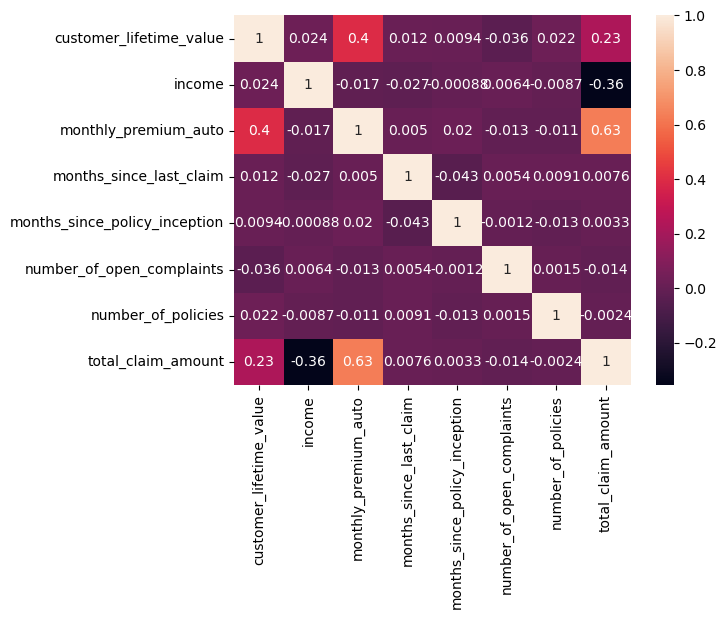

In [9]:
correlations_matrix = numericals_df.corr()
sns.heatmap(correlations_matrix, annot=True)
plt.show()

In [10]:
# Because our target is 'total_claim_amount' and it has high correlation with CLV and MLA, we opt to drop.

numericals_df = numericals_df.drop(columns=['customer_lifetime_value', 'monthly_premium_auto'])
numericals_df

,income,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,56274,32,5,0,1,384.811147
1,0,13,42,0,8,1131.464935
2,48767,18,38,0,2,566.472247
3,0,18,65,0,7,529.881344
4,43836,12,44,0,1,138.130879
...,...,...,...,...,...,...
9129,71941,18,89,0,2,198.234764
9130,21604,14,28,0,1,379.200000
9131,0,9,37,3,2,790.784983
9132,21941,34,3,0,3,691.200000


## Plotting Numerical Data

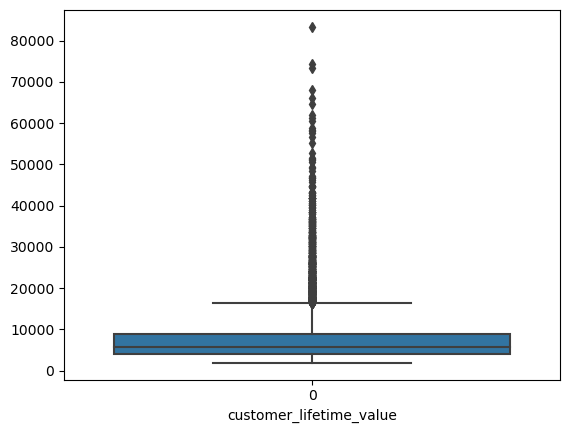

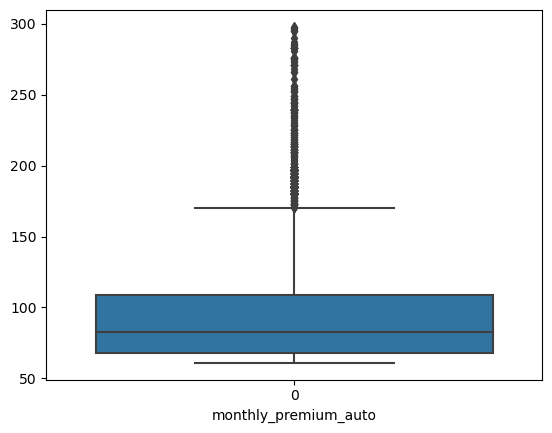

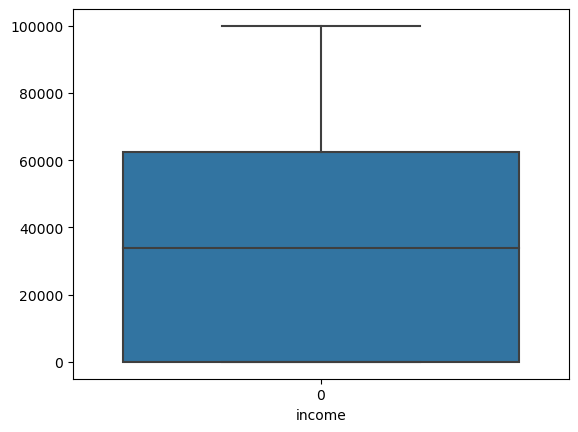

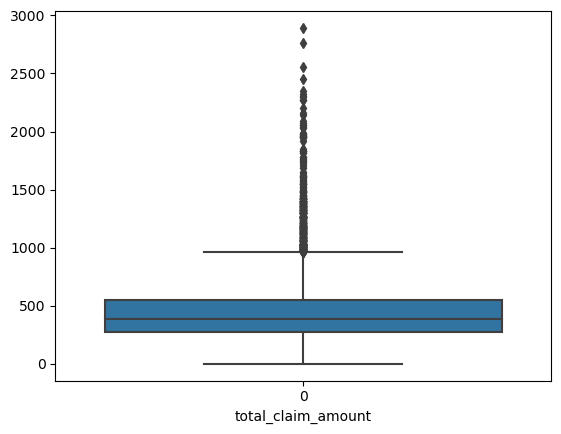

In [11]:
sns.boxplot(continuous_df['customer_lifetime_value'])
plt.xlabel('customer_lifetime_value')
plt.show()

sns.boxplot(continuous_df['monthly_premium_auto'])
plt.xlabel('monthly_premium_auto')
plt.show()

sns.boxplot(continuous_df['income'])
plt.xlabel('income')
plt.show()

sns.boxplot(continuous_df['total_claim_amount'])
plt.xlabel('total_claim_amount')
plt.show()

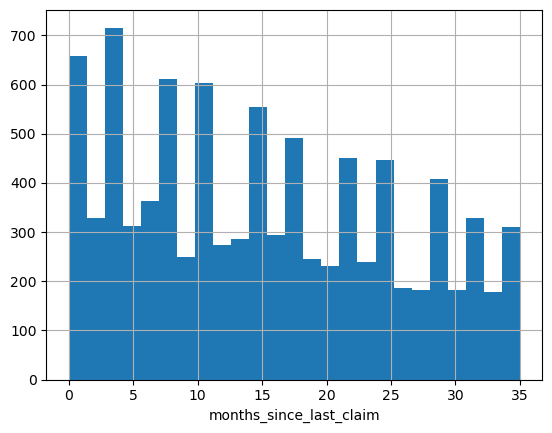

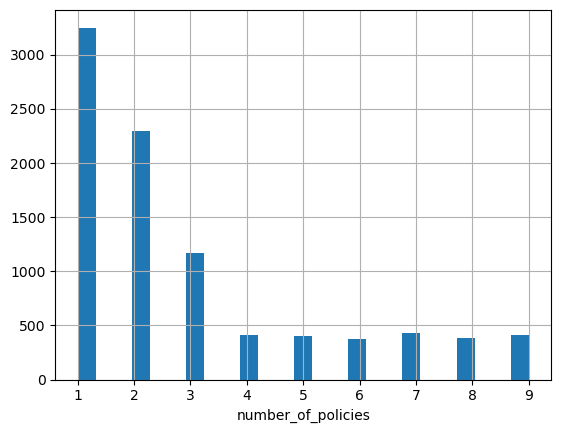

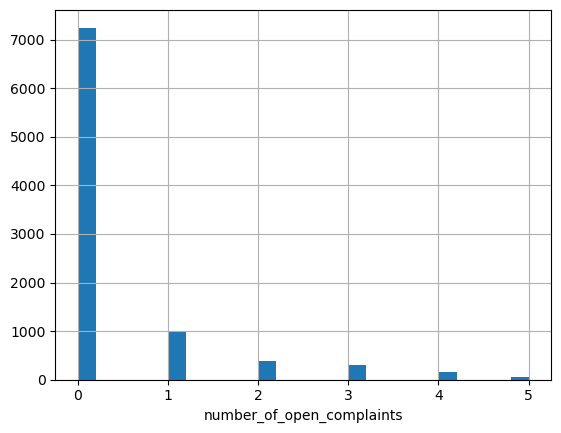

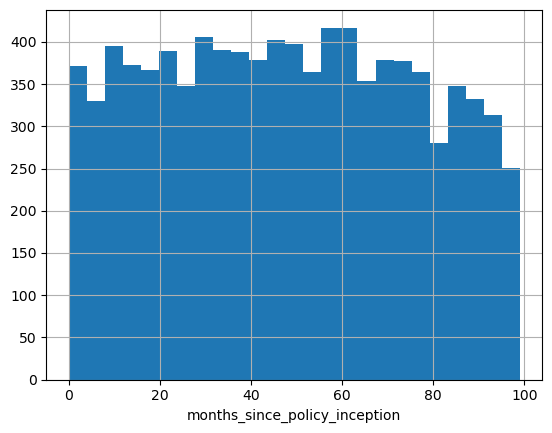

In [12]:
discrete_df['months_since_last_claim'].hist(bins=25)
plt.xlabel('months_since_last_claim') 
plt.show()

discrete_df['number_of_policies'].hist(bins=25)
plt.xlabel('number_of_policies')
plt.show()

discrete_df['number_of_open_complaints'].hist(bins=25)
plt.xlabel('number_of_open_complaints')
plt.show()

discrete_df['months_since_policy_inception'].hist(bins=25)
plt.xlabel('months_since_policy_inception')
plt.show()

In [13]:
# Check for any NaN values

print(numericals_df.isnull().any().any())
print(categoricals_df.isnull().any().any())
print(data.isnull().any().any())

False
False
False


# Part 2

## Create Categorical DataFrame

In [14]:
categoricals_df = data.select_dtypes(object)
display(categoricals_df.head())

,customer,state,response,coverage,education,effective_to_date,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,2011-02-24,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,2011-01-31,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,2011-02-19,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,2011-01-20,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,2011-02-03,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


In [15]:
categoricals_df.dtypes

customer             object
state                object
response             object
coverage             object
education            object
effective_to_date    object
employmentstatus     object
gender               object
location_code        object
marital_status       object
policy_type          object
policy               object
renew_offer_type     object
sales_channel        object
vehicle_class        object
vehicle_size         object
dtype: object

## Checking the categorical data

Reviewing the value counts in the categorical dataframe there doesn't seem to be any anomalies or outliers when it comes to the data itself. 

In [16]:
display(categoricals_df.state.value_counts(dropna=False))
display(categoricals_df.response.value_counts(dropna=False))
display(categoricals_df.coverage.value_counts(dropna=False))
display(categoricals_df.education.value_counts(dropna=False))
display(categoricals_df.effective_to_date.value_counts(dropna=False))
display(categoricals_df.employmentstatus.value_counts(dropna=False))
display(categoricals_df.gender.value_counts(dropna=False))
display(categoricals_df.location_code.value_counts(dropna=False))
display(categoricals_df.marital_status.value_counts(dropna=False))
display(categoricals_df.policy_type.value_counts(dropna=False))
display(categoricals_df.policy.value_counts(dropna=False))
display(categoricals_df.renew_offer_type.value_counts(dropna=False))
display(categoricals_df.sales_channel.value_counts(dropna=False))
display(categoricals_df.vehicle_class.value_counts(dropna=False))
display(categoricals_df.vehicle_size.value_counts(dropna=False))

display(categoricals_df.effective_to_date.nunique())


California    3150
Oregon        2601
Arizona       1703
Nevada         882
Washington     798
Name: state, dtype: int64

No     7826
Yes    1308
Name: response, dtype: int64

Basic       5568
Extended    2742
Premium      824
Name: coverage, dtype: int64

Bachelor                2748
College                 2681
High School or Below    2622
Master                   741
Doctor                   342
Name: education, dtype: int64

2011-01-10    195
2011-01-27    194
2011-02-14    186
2011-01-26    181
2011-01-17    180
2011-01-19    179
2011-01-31    178
2011-01-03    178
2011-01-20    173
2011-02-26    169
2011-01-28    169
2011-02-19    168
2011-01-05    167
2011-02-27    167
2011-01-11    166
2011-02-04    164
2011-02-10    161
2011-02-28    161
2011-01-02    160
2011-01-21    160
2011-01-29    160
2011-02-22    158
2011-02-05    158
2011-02-03    158
2011-02-07    157
2011-02-12    156
2011-01-23    155
2011-02-01    154
2011-01-18    154
2011-01-15    153
2011-01-14    152
2011-02-11    151
2011-01-07    151
2011-01-25    151
2011-02-25    149
2011-01-08    149
2011-02-18    149
2011-02-02    149
2011-01-01    148
2011-02-21    148
2011-01-24    147
2011-01-09    146
2011-01-30    145
2011-01-13    145
2011-02-06    144
2011-01-06    143
2011-02-23    143
2011-01-16    142
2011-02-16    139
2011-02-13    139
2011-02-24    139
2011-02-09    137
2011-02-17    136
2011-01-22    136
2011-02-08    134
2011-02-20

Employed         5698
Unemployed       2317
Medical Leave     432
Disabled          405
Retired           282
Name: employmentstatus, dtype: int64

F    4658
M    4476
Name: gender, dtype: int64

Suburban    5779
Rural       1773
Urban       1582
Name: location_code, dtype: int64

Married     5298
Single      2467
Divorced    1369
Name: marital_status, dtype: int64

Personal Auto     6788
Corporate Auto    1968
Special Auto       378
Name: policy_type, dtype: int64

Personal L3     3426
Personal L2     2122
Personal L1     1240
Corporate L3    1014
Corporate L2     595
Corporate L1     359
Special L2       164
Special L3       148
Special L1        66
Name: policy, dtype: int64

Offer1    3752
Offer2    2926
Offer3    1432
Offer4    1024
Name: renew_offer_type, dtype: int64

Agent          3477
Branch         2567
Call Center    1765
Web            1325
Name: sales_channel, dtype: int64

Four-Door Car    4621
Two-Door Car     1886
SUV              1796
Sports Car        484
Luxury SUV        184
Luxury Car        163
Name: vehicle_class, dtype: int64

Medsize    6424
Small      1764
Large       946
Name: vehicle_size, dtype: int64

59

## Reviewing the data

We can see that there are 3 different policy levels for the 3 policy (Personal, Corporate and Special) types. The assumption is that the policy types offers different types of insurance features, based on either cost or duration. Since the the policy_type column is the first tier for policy, the information in this column is irrelevant therefore I decided to drop. For vehicle_class, Luxury SUV and Cars are combined into one.

In [17]:
categoricals_df['employmentstatus'] = np.where(data['employmentstatus'].isin(['Medical Leave','Disabled','Retired']) , 'Other', categoricals_df['employmentstatus'])
categoricals_df['vehicle_class'] = np.where(data['vehicle_class'].isin(['Luxury SUV','Luxury Car']) , 'Luxury', categoricals_df['vehicle_class'])
categoricals_df['education'] = np.where(data['education'].isin(['Master','Doctor']) , 'Master', categoricals_df['education'])



# Reviewing the data, to drop the following columns
# Not clear what relation it has to potential customer lifetime value or total claim amount

categoricals_df = categoricals_df.drop(columns=['customer', 'response','policy_type','sales_channel','renew_offer_type'])

categoricals_df.columns.tolist()

['state',
 'coverage',
 'education',
 'effective_to_date',
 'employmentstatus',
 'gender',
 'location_code',
 'marital_status',
 'policy',
 'vehicle_class',
 'vehicle_size']

In [18]:
# Intermediate saving

numericals_df.to_csv('numericals.csv', index=False)
categoricals_df.to_csv('categoricals.csv', index=False)

## Plotting Categorical Data

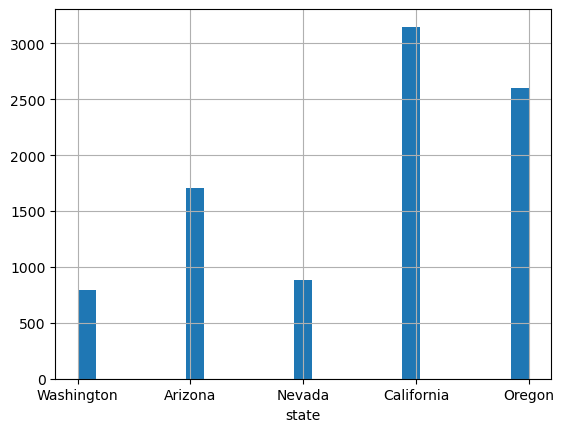

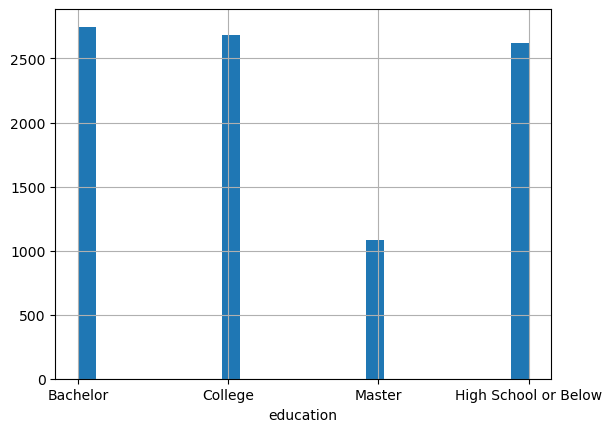

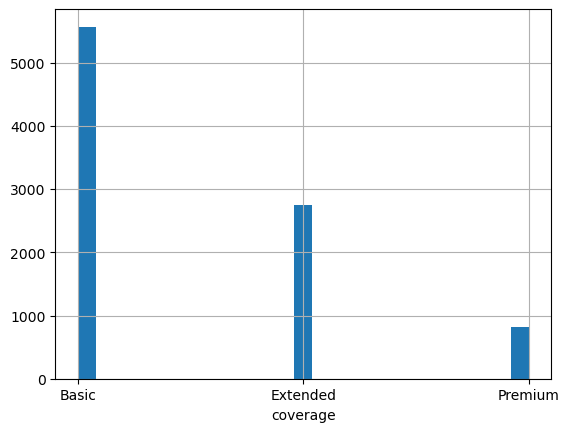

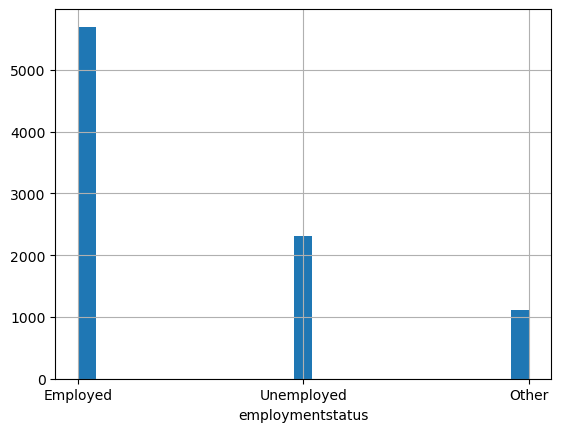

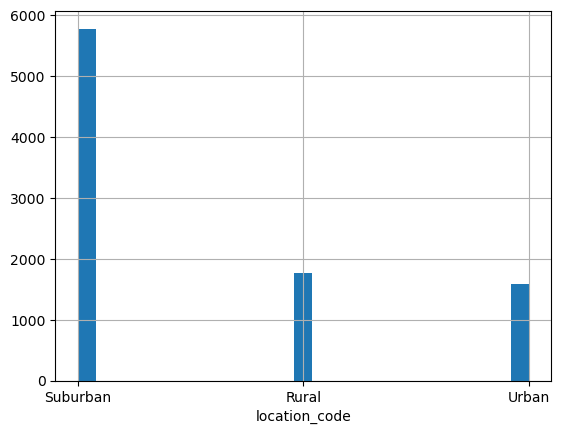

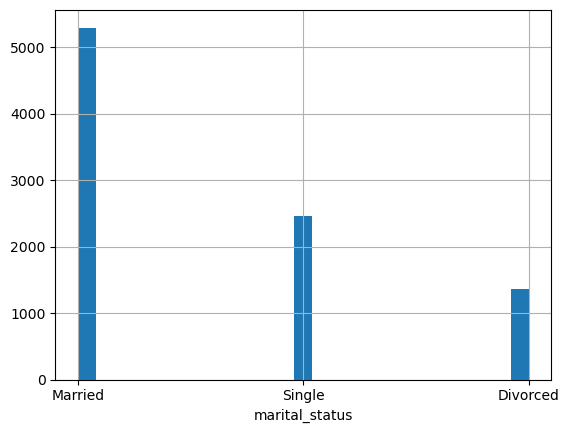

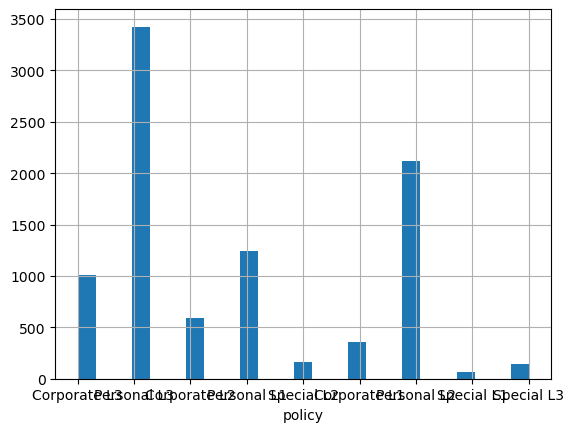

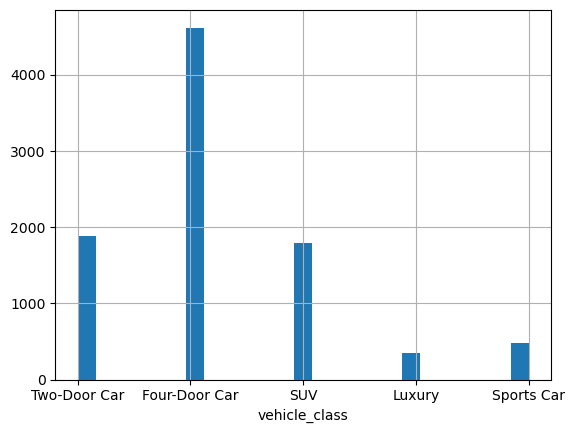

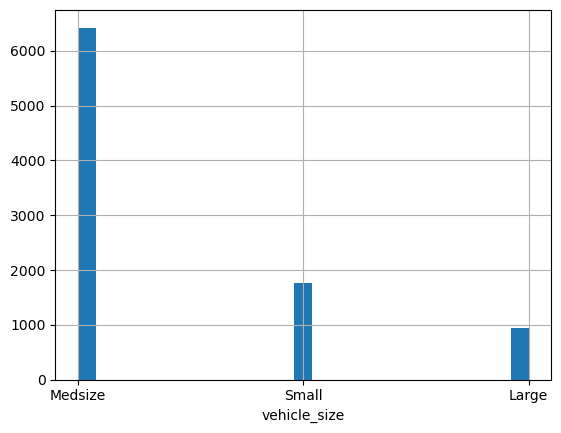

In [19]:
categoricals_df['state'].hist(bins=25)
plt.xlabel('state') 
plt.show()

categoricals_df['education'].hist(bins=25)
plt.xlabel('education') 
plt.show()

categoricals_df['coverage'].hist(bins=25)
plt.xlabel('coverage') 
plt.show()

categoricals_df['employmentstatus'].hist(bins=25)
plt.xlabel('employmentstatus') 
plt.show()

categoricals_df['location_code'].hist(bins=25)
plt.xlabel('location_code') 
plt.show()

categoricals_df['marital_status'].hist(bins=25)
plt.xlabel('marital_status') 
plt.show()

categoricals_df['policy'].hist(bins=25)
plt.xlabel('policy') 
plt.show()

categoricals_df['vehicle_class'].hist(bins=25)
plt.xlabel('vehicle_class') 
plt.show()

categoricals_df['vehicle_size'].hist(bins=25)
plt.xlabel('vehicle_size') 
plt.show()

## Effective Date / Time

Looking at the time variable for the 'effective_to_date' column, I want to convert this a numerical value and convert the values to calendar week so enable scaling of the data.

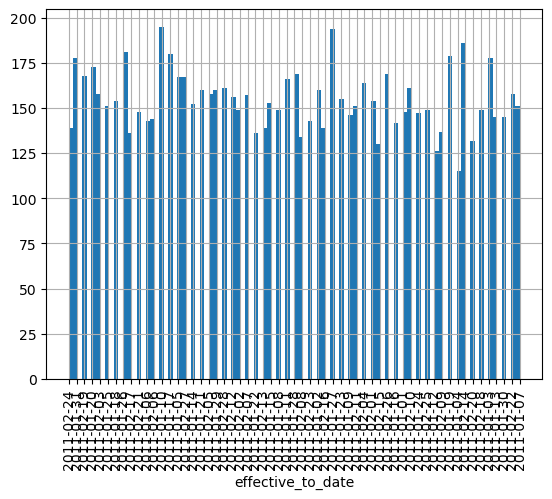

In [20]:
# Checking the box plot for the date column to visualise the data better

categoricals_df['effective_to_date'].hist(bins=100)
plt.xlabel('effective_to_date') 
plt.xticks(rotation=90)
plt.show()

In [21]:
# based on this information i want to convert the dates into weeks

effective_move = categoricals_df['effective_to_date']
numericals_df['effective_to_date'] = effective_move
categoricals_df = categoricals_df.drop(columns=['effective_to_date'])                                  
numericals_df['effective_to_date'] = pd.to_datetime(numericals_df['effective_to_date'])


# ensure that the first week starts from the first day of the year

week1_start_date = pd.to_datetime('2011-01-01')
numericals_df['effective_to_date'] = ((numericals_df['effective_to_date'] - week1_start_date).dt.days // 7) + 1
print(numericals_df['effective_to_date'])


# check the values within the updated date column

display(numericals_df.effective_to_date.value_counts(dropna=True))



0       8
1       5
2       8
3       3
4       5
       ..
9129    6
9130    7
9131    6
9132    5
9133    7
Name: effective_to_date, Length: 9134, dtype: int64


3    1141
4    1133
5    1108
2    1079
1    1062
6    1042
8    1037
7    1035
9     497
Name: effective_to_date, dtype: int64

In [22]:
# check the updated numerical and categorical columns

display(numericals_df.dtypes)
display(categoricals_df.dtypes)

income                             int64
months_since_last_claim            int64
months_since_policy_inception      int64
number_of_open_complaints          int64
number_of_policies                 int64
total_claim_amount               float64
effective_to_date                  int64
dtype: object

state               object
coverage            object
education           object
employmentstatus    object
gender              object
location_code       object
marital_status      object
policy              object
vehicle_class       object
vehicle_size        object
dtype: object

## Clean Dataframe

In [23]:
new_df = pd.concat([categoricals_df, numericals_df], axis=1)
new_df.dtypes
new_df     

,state,coverage,education,employmentstatus,gender,location_code,marital_status,policy,vehicle_class,vehicle_size,income,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,effective_to_date
0,Washington,Basic,Bachelor,Employed,F,Suburban,Married,Corporate L3,Two-Door Car,Medsize,56274,32,5,0,1,384.811147,8
1,Arizona,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal L3,Four-Door Car,Medsize,0,13,42,0,8,1131.464935,5
2,Nevada,Premium,Bachelor,Employed,F,Suburban,Married,Personal L3,Two-Door Car,Medsize,48767,18,38,0,2,566.472247,8
3,California,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate L2,SUV,Medsize,0,18,65,0,7,529.881344,3
4,Washington,Basic,Bachelor,Employed,M,Rural,Single,Personal L1,Four-Door Car,Medsize,43836,12,44,0,1,138.130879,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,Basic,Bachelor,Employed,M,Urban,Married,Personal L1,Four-Door Car,Medsize,71941,18,89,0,2,198.234764,6
9130,California,Extended,College,Employed,F,Suburban,Divorced,Corporate L3,Four-Door Car,Medsize,21604,14,28,0,1,379.200000,7
9131,California,Extended,Bachelor,Unemployed,M,Suburban,Single,Corporate L2,Four-Door Car,Medsize,0,9,37,3,2,790.784983,6
9132,California,Extended,College,Employed,M,Suburban,Married,Personal L2,Four-Door Car,Large,21941,34,3,0,3,691.200000,5


## Split the DataFrame X-y

In [24]:
X = new_df.drop('total_claim_amount', axis = 1)
y = new_df['total_claim_amount']

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Scale & Encode

In [26]:
# Seprate the training and testing data between numerical and categorical columns

X_train_cat = X_train.select_dtypes(object)
X_train_num = X_train.select_dtypes(np.number)

X_test_cat = X_test.select_dtypes(object)
X_test_num = X_test.select_dtypes(np.number)

In [27]:
# Use standard scaler since there was no numericals in minus

transformer = StandardScaler().fit(X_train_num)

X_train_scaled = pd.DataFrame(transformer.transform(X_train_num), columns=X_train_num.columns)
X_test_scaled = pd.DataFrame(transformer.transform(X_test_num), columns=X_test_num.columns)

display(X_train_scaled.head())
display(X_test_scaled.head())

display(X_train.shape)
display(X_test.shape)

,income,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,effective_to_date
0,0.451347,1.278496,-0.570400,0.680218,2.504111,-1.112427
1,-1.242714,1.476446,-0.820599,-0.416990,-0.828167,0.933200
2,1.443490,-0.799983,0.680592,-0.416990,-0.828167,1.751452
3,1.150912,-1.294859,0.644850,-0.416990,2.504111,-1.112427
4,0.570359,-1.195884,1.359702,-0.416990,-0.828167,-0.703302


,income,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,effective_to_date
0,1.227791,-1.393834,0.037225,-0.416990,-0.828167,-0.703302
1,-0.473656,-0.799983,-1.356738,-0.416990,0.421437,-1.521553
2,1.900791,-1.195884,-0.355944,-0.416990,-0.828167,-0.294176
3,1.312852,-1.195884,-0.749113,0.680218,0.837972,0.524075
4,-0.455405,0.288744,-1.213768,-0.416990,-0.411632,1.342326


(7307, 16)

(1827, 16)

In [28]:
# Separate 

X_train_cat_onehot = X_train_cat.drop(columns=['coverage','education','employmentstatus']) 
display(X_train_cat_onehot.head())
display(X_train_cat_onehot.shape)

X_test_cat_onehot = X_test_cat.drop(columns=['coverage','education','employmentstatus']) 
display(X_test_cat_onehot.head())
display(X_test_cat_onehot.shape)

,state,gender,location_code,marital_status,policy,vehicle_class,vehicle_size
5123,Washington,M,Urban,Married,Personal L3,Two-Door Car,Medsize
7738,Oregon,F,Suburban,Single,Special L2,Four-Door Car,Medsize
214,Arizona,M,Suburban,Divorced,Personal L1,Four-Door Car,Small
8580,California,F,Urban,Married,Corporate L3,Four-Door Car,Medsize
7857,Washington,F,Suburban,Single,Personal L3,Four-Door Car,Medsize


(7307, 7)

,state,gender,location_code,marital_status,policy,vehicle_class,vehicle_size
708,California,M,Rural,Married,Personal L3,SUV,Medsize
47,Oregon,F,Suburban,Single,Personal L2,Two-Door Car,Medsize
3995,Oregon,F,Suburban,Married,Personal L3,Two-Door Car,Small
1513,California,F,Urban,Married,Personal L3,Four-Door Car,Medsize
3686,Washington,F,Suburban,Divorced,Personal L2,Four-Door Car,Medsize


(1827, 7)

In [38]:
# OneHot encode the training and testing categorical values

encoder = OneHotEncoder(drop="first").fit(X_train_cat_onehot)

encoded = encoder.transform(X_train_cat_onehot).toarray()
X_train_cat_onehot = pd.DataFrame(encoded, columns = encoder.get_feature_names_out())
X_train_cat_onehot.head()




(7307, 23)

In [39]:
# OneHot encode the test categorical values

encoder = OneHotEncoder(drop="first").fit(X_test_cat_onehot)

encoded = encoder.transform(X_test_cat_onehot).toarray()
X_test_cat_onehot = pd.DataFrame(encoded, columns = encoder.get_feature_names_out())
X_test_cat_onehot.shape

(1827, 23)

In [31]:
# Ordinal Encode training columns

X_train_cat["coverage"] = X_train_cat["coverage"].replace({"Basic" : 0, "Extended" : 1, "Premium" : 2})
X_train_cat["education"] = X_train_cat["education"].replace({"Bachelor" : 0, "College" : 1, "High School or Below" : 2, "Master" : 3})
X_train_cat["employmentstatus"] = X_train_cat["employmentstatus"].replace({"Other" : 0, "Unemployed" : 1, "Employed" : 2})

X_train_cat_ord = X_train_cat[['coverage','education','employmentstatus']]

In [41]:
# Ordinal Encode test columns

X_test_cat["coverage"] = X_test_cat["coverage"].replace({"Basic" : 0, "Extended" : 1, "Premium" : 2})
X_test_cat["education"] = X_test_cat["education"].replace({"Bachelor" : 0, "College" : 1, "High School or Below" : 2, "Master" : 3})
X_test_cat["employmentstatus"] = X_test_cat["employmentstatus"].replace({"Other" : 0, "Unemployed" : 1, "Employed" : 2})

X_test_cat_ord = X_test_cat[['coverage','education','employmentstatus']]

X_test_cat_ord.shape


(1827, 3)

In [43]:
display(X_train_cat_onehot)
display(X_train_cat_ord)
display(X_test_cat_onehot.shape)
display(X_test_cat_ord.shape)

,state_California_1.0,state_Nevada_1.0,state_Oregon_1.0,state_Washington_1.0,gender_M_1.0,location_code_Suburban_1.0,location_code_Urban_1.0,marital_status_Married_1.0,marital_status_Single_1.0,policy_Corporate L2_1.0,...,policy_Personal L3_1.0,policy_Special L1_1.0,policy_Special L2_1.0,policy_Special L3_1.0,vehicle_class_Luxury_1.0,vehicle_class_SUV_1.0,vehicle_class_Sports Car_1.0,vehicle_class_Two-Door Car_1.0,vehicle_size_Medsize_1.0,vehicle_size_Small_1.0
0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7302,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7303,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
7304,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
7305,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


,coverage,education,employmentstatus
0,0,0,2
1,1,1,1
2,0,1,2
3,0,0,2
4,0,0,2
...,...,...,...
7302,0,1,2
7303,0,1,0
7304,1,2,1
7305,1,0,1


(1827, 23)

(1827, 3)

In [44]:
X_train_cat_onehot.reset_index(drop=True, inplace=True)
X_train_cat_ord.reset_index(drop=True, inplace=True)
X_test_cat_onehot.reset_index(drop=True, inplace=True)
X_test_cat_ord.reset_index(drop=True, inplace=True)

X_train_processed = pd.concat([X_train_cat_onehot, X_train_cat_ord], axis=1)
X_test_processed = pd.concat([X_test_cat_onehot, X_test_cat_ord], axis=1)

display(X_train_processed)
display(X_test_processed)

,state_California_1.0,state_Nevada_1.0,state_Oregon_1.0,state_Washington_1.0,gender_M_1.0,location_code_Suburban_1.0,location_code_Urban_1.0,marital_status_Married_1.0,marital_status_Single_1.0,policy_Corporate L2_1.0,...,policy_Special L3_1.0,vehicle_class_Luxury_1.0,vehicle_class_SUV_1.0,vehicle_class_Sports Car_1.0,vehicle_class_Two-Door Car_1.0,vehicle_size_Medsize_1.0,vehicle_size_Small_1.0,coverage,education,employmentstatus
0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0,0,2
1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,1,1
2,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,1,2
3,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,0,2
4,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7302,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,1,2
7303,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,1,0
7304,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1,2,1
7305,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1,0,1


,state_California_1.0,state_Nevada_1.0,state_Oregon_1.0,state_Washington_1.0,gender_M_1.0,location_code_Suburban_1.0,location_code_Urban_1.0,marital_status_Married_1.0,marital_status_Single_1.0,policy_Corporate L2_1.0,...,policy_Special L3_1.0,vehicle_class_Luxury_1.0,vehicle_class_SUV_1.0,vehicle_class_Sports Car_1.0,vehicle_class_Two-Door Car_1.0,vehicle_size_Medsize_1.0,vehicle_size_Small_1.0,coverage,education,employmentstatus
0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0,2,2
1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0,2,2
2,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1,1,2
3,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,1,2
4,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1822,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0,1,2
1823,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,2,2
1824,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0,0,2
1825,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,2,1


In [46]:
# Intermediate saving

numericals_df.to_csv('numericals.csv', index=False)
X_train_processed.to_csv('categoricals_train_processed.csv', index=False)
X_test_processed.to_csv('categoricals_test_processed.csv', index=False)